## Modelo predictivo 

by @unaibermudez



--- Información General ---
Número de filas: 358008
Número de columnas: 8

Tipos de datos:
target         int64
ref_value    float64
DPSA_1       float64
DPSA_2       float64
DPSA_3       float64
DLOGP_1      float64
DLOGP_2      float64
DLOGP_3      float64
dtype: object

--- Primeras Filas del Dataset ---
   target  ref_value  DPSA_1  DPSA_2  DPSA_3  DLOGP_1  DLOGP_2  DLOGP_3
0       0     -0.572  -0.068  -3.549  -2.013   -0.740    0.091   -2.080
1       0     -0.572  -2.665  -2.032  -0.630   -1.121    0.567   -0.200
2       0     -0.572  -1.930  -2.774  -1.669   -1.547    0.071   -0.732
3       0     -0.572  -1.137  -1.317  -1.669   -1.604    0.459   -0.732
4       0     -0.572  -3.262  -2.032  -1.744   -2.490    0.567   -0.260

--- Distribución de la Clase (target) ---
target
0    349173
1      8835
Name: count, dtype: int64


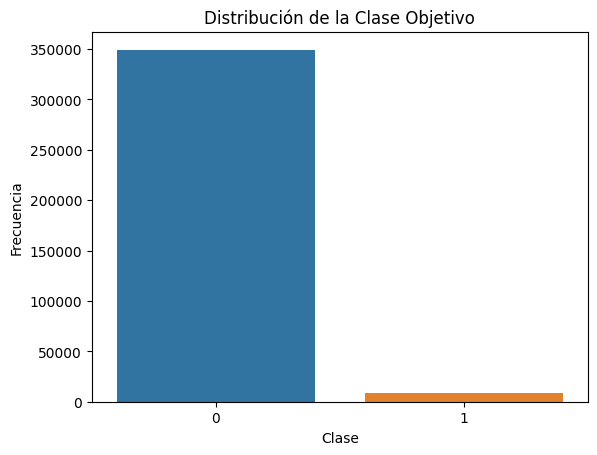


--- Estadísticas Descriptivas ---
              target      ref_value         DPSA_1         DPSA_2  \
count  358008.000000  358008.000000  358008.000000  358008.000000   
mean        0.024678      -0.000126      -0.000022       0.000025   
std         0.155143       1.000074       1.000020       0.999909   
min         0.000000      -0.572000      -3.826000      -3.696000   
25%         0.000000      -0.572000      -0.687000      -0.756000   
50%         0.000000      -0.572000      -0.172000      -0.372000   
75%         0.000000       0.282000       0.505000       1.052000   
max         1.000000      31.938000       9.635000       5.460000   

              DPSA_3        DLOGP_1        DLOGP_2        DLOGP_3  
count  358008.000000  358008.000000  358008.000000  358008.000000  
mean        0.000004      -0.000009       0.000048      -0.000004  
std         1.000026       1.000008       1.000022       0.999992  
min        -8.313000      -7.531000      -2.347000      -6.222000  
25%

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ocultar futuros warnings de seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

# Cargar el dataset
file_path = 'data.csv'
df = pd.read_csv(file_path, sep=';', decimal='.')

# Eliminar columna 'n' (índice)
df = df.drop(columns=['n'])

# Información general
print("\n--- Información General ---")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print("\nTipos de datos:")
print(df.dtypes)

# Ver primeros registros
print("\n--- Primeras Filas del Dataset ---")
print(df.head())

# Distribución de la clase objetivo (target)
print("\n--- Distribución de la Clase (target) ---")
print(df['target'].value_counts())
sns.countplot(x='target', data=df)
plt.title('Distribución de la Clase Objetivo')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas
print("\n--- Estadísticas Descriptivas ---")
print(df.describe())


### Baseline model con RandomForest

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# === BASELINE MODEL ===
print("\n--- Entrenando modelo baseline con Random Forest ---")

# Separar variables predictoras y target
X = df.drop(columns=['target'])
y = df['target']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluación
print("\n--- Matriz de Confusión ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

print("\n--- ROC AUC ---")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")




--- Entrenando modelo baseline con Random Forest ---

--- Matriz de Confusión ---
[[69654   181]
 [ 1558   209]]

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     69835
           1       0.54      0.12      0.19      1767

    accuracy                           0.98     71602
   macro avg       0.76      0.56      0.59     71602
weighted avg       0.97      0.98      0.97     71602


--- ROC AUC ---
AUC: 0.9559


### XGBoostClassifier


In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Calcular ratio para balanceo
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Entrenar XGBoost con ajuste para clases desbalanceadas
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluación
print("\n--- Matriz de Confusión (XGBoost) ---")
print(confusion_matrix(y_test, y_pred_xgb))

print("\n--- Reporte de Clasificación (XGBoost) ---")
print(classification_report(y_test, y_pred_xgb))

print("\n--- ROC AUC (XGBoost) ---")
print(f"AUC: {roc_auc_score(y_test, y_proba_xgb):.4f}")


C:\Users\unai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [16:02:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Matriz de Confusión (XGBoost) ---
[[63945  5890]
 [  180  1587]]

--- Reporte de Clasificación (XGBoost) ---
              precision    recall  f1-score   support

           0       1.00      0.92      0.95     69835
           1       0.21      0.90      0.34      1767

    accuracy                           0.92     71602
   macro avg       0.60      0.91      0.65     71602
weighted avg       0.98      0.92      0.94     71602


--- ROC AUC (XGBoost) ---
AUC: 0.9665


### 🔧 Ajuste del Umbral de Decisión (Threshold Tuning)
El modelo XGBoost predice probabilidades para cada clase. Por defecto, se clasifica como coinfección (1) si la probabilidad es mayor o igual a 0.5. Sin embargo, podemos ajustar este umbral para mejorar el equilibrio entre precisión y recall, especialmente útil en problemas desbalanceados. A continuación se visualiza la curva precisión vs. recall y se evalúan los resultados usando un umbral personalizado.

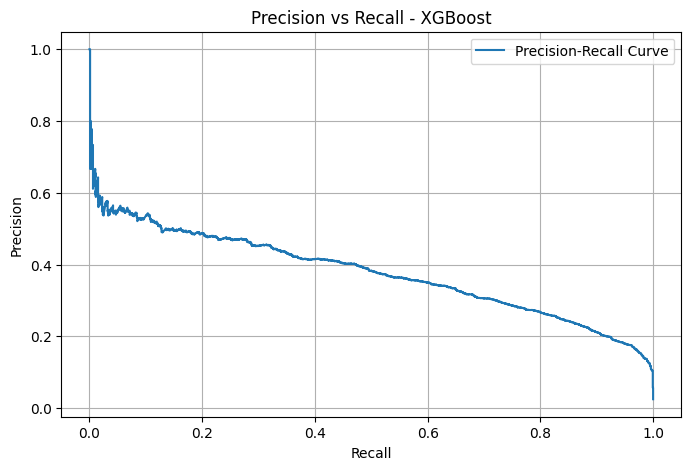


--- Evaluación con threshold = 0.7 ---
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     69835
           1       0.26      0.82      0.39      1767

    accuracy                           0.94     71602
   macro avg       0.63      0.88      0.68     71602
weighted avg       0.98      0.94      0.95     71602



In [14]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report

# Curva precision-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_xgb)

# Gráfico precision vs recall
plt.figure(figsize=(8, 5))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall - XGBoost')
plt.grid()
plt.legend()
plt.show()

# Evaluación con umbral ajustado
custom_thresh = 0.7  # puedes probar otros como 0.6, 0.75, etc.
y_pred_thresh = (y_proba_xgb >= custom_thresh).astype(int)

print(f"\n--- Evaluación con threshold = {custom_thresh} ---")
print(classification_report(y_test, y_pred_thresh))


### 🔍 Búsqueda del Mejor Umbral Basado en F1-Score
Para optimizar la clasificación de coinfecciones, probamos distintos umbrales de decisión y calculamos el F1-score para cada uno. El F1-score es útil cuando hay desbalance entre clases, ya que combina precisión y recall en una única métrica. A continuación se identifica el umbral óptimo y se muestra el rendimiento asociado.

In [15]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Búsqueda de threshold óptimo
best_thresh = 0.5
best_f1 = 0

print("Threshold\tF1-score\tPrecision\tRecall")
for thresh in np.arange(0.1, 0.95, 0.05):
    y_pred_thresh = (y_proba_xgb >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    print(f"{thresh:.2f}\t\t{f1:.4f}\t\t{prec:.4f}\t\t{rec:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

# Evaluación final con el mejor threshold
print(f"\n--- Mejor threshold según F1-score: {best_thresh:.2f} ---")
y_pred_best = (y_proba_xgb >= best_thresh).astype(int)
print(classification_report(y_test, y_pred_best))


Threshold	F1-score	Precision	Recall
0.10		0.2435		0.1389		0.9842
0.15		0.2605		0.1502		0.9791
0.20		0.2758		0.1607		0.9717
0.25		0.2890		0.1700		0.9643
0.30		0.3007		0.1786		0.9519
0.35		0.3107		0.1862		0.9366
0.40		0.3217		0.1947		0.9259
0.45		0.3315		0.2026		0.9111
0.50		0.3434		0.2123		0.8981
0.55		0.3554		0.2223		0.8862
0.60		0.3682		0.2336		0.8681
0.65		0.3781		0.2435		0.8449
0.70		0.3927		0.2582		0.8200
0.75		0.4052		0.2733		0.7827
0.80		0.4186		0.2927		0.7346
0.85		0.4335		0.3220		0.6633
0.90		0.4390		0.3640		0.5529

--- Mejor threshold según F1-score: 0.90 ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     69835
           1       0.36      0.55      0.44      1767

    accuracy                           0.97     71602
   macro avg       0.68      0.76      0.71     71602
weighted avg       0.97      0.97      0.97     71602



### 🧠 Modelo Mejorado: XGBoost + Threshold Óptimo
Tras probar múltiples umbrales, se determinó que el threshold de 0.90 ofrece el mejor equilibrio F1-score para predecir coinfección. A continuación, se entrena un nuevo modelo XGBoost utilizando los mismos parámetros y se aplica directamente el threshold ajustado para obtener predicciones más efectivas.

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Reentrenar el modelo con mismos parámetros
xgb_final = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                          scale_pos_weight=scale_pos_weight, random_state=42)
xgb_final.fit(X_train, y_train)

# Predecir con threshold óptimo (0.90)
y_proba_final = xgb_final.predict_proba(X_test)[:, 1]
y_pred_final = (y_proba_final >= 0.90).astype(int)

# Evaluación
print("\n--- Matriz de Confusión (Modelo Mejorado) ---")
print(confusion_matrix(y_test, y_pred_final))

print("\n--- Reporte de Clasificación (Modelo Mejorado) ---")
print(classification_report(y_test, y_pred_final))

print("\n--- ROC AUC (Modelo Mejorado) ---")
print(f"AUC: {roc_auc_score(y_test, y_proba_final):.4f}")


C:\Users\unai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [16:09:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Matriz de Confusión (Modelo Mejorado) ---
[[68128  1707]
 [  790   977]]

--- Reporte de Clasificación (Modelo Mejorado) ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     69835
           1       0.36      0.55      0.44      1767

    accuracy                           0.97     71602
   macro avg       0.68      0.76      0.71     71602
weighted avg       0.97      0.97      0.97     71602


--- ROC AUC (Modelo Mejorado) ---
AUC: 0.9665
